## Using Pre-Trained Models
In this exercise we will show how to load pre-trained models such as VGG16 and ResNet.  This is a fairly simple exercise designed to get you familiar with models like VGG and Resnet and the output they give.

You will load in the VGG and ResNet models.  You will then use your laptop camera to take a picture.  Then you will run your picture through these models to see the results.

You can also take pictures yourself and manually upload them.  Or find images on the internet and download them.  

Look at the results for at least 5 different pictures and consider:

- Did the models get the "right" answer?  Was the "right" answer on the list?
- How confident was the prediction (did the top choice have a probability close to 1?)
- How did the model handle pictures with multiple objects in them? (e.g. the rocking chair picture)
- What were some of the "wrong" answers on the list?  Can you understand why the image classifier may have thought those other answers were correct?


In [1]:
# install opencv if you haven't
# conda install -c https://conda.binstar.org/menpo opencv3
# pip install pillow

In [19]:
! pip install imageio

In [1]:
from PIL import Image
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import numpy as np
import pandas as pd

import cv2
#from scipy.misc import imread
from imageio import imread
import matplotlib.pyplot as plt

%matplotlib inline

tf.keras.backend.clear_session()

In [2]:
def get_image(camera):
    retval, im = camera.read()
    return im

In [3]:
def save_webcam_image(img_path):

    try:
        camera_port = 0
        ramp_frames = 10
    
        camera = cv2.VideoCapture(camera_port)

        for i in range(ramp_frames):
            retval, im_camera = camera.read()

        retval, im_camera = camera.read()

        im = cv2.resize(im_camera, (224, 224)).astype(np.float32)
        cv2.imwrite(img_path, im)
        del (camera)
        return True
    except ValueError as e:
        print("Image Capture Failed")
    return False

In [6]:
img_path = "cat1.jpg"


##if save_webcam_image(img_path) is False:
##    # Webcam not active, use the Dog Image
##    img_path = "rocking_chair.jpg"
##    print("Using the Test Rocking Chair Image: {}".format(img_path))

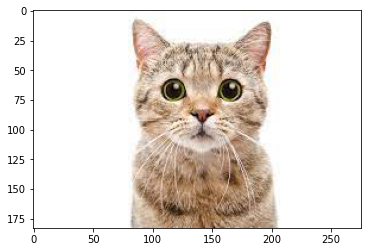

In [7]:
plt.imshow(imread(img_path))

## VGG16 - Pretrained Model

In [25]:
from tensorflow.keras.applications import vgg16
vgg16_model = vgg16.VGG16(weights='imagenet')
vgg16_model.summary()

553467904/553467096 [==============================] - 991s 2us/step
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
__________________________________________________________

In [8]:
# Utility Function to Load Image, Preprocess input and Targets
def predict_image(model, img_path, preprocess_input_fn, decode_predictions_fn, target_size=(224, 224)):

    img = image.load_img(img_path, target_size=target_size)
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input_fn(x)
    
    preds = model.predict(x)
    predictions_df = pd.DataFrame(decode_predictions_fn(preds, top=10)[0])
    predictions_df.columns = ["Predicted Class", "Name", "Probability"]
    return predictions_df

In [15]:
from tensorflow import keras
from tensorflow.keras.applications import vgg16
vgg16_model=keras.models.load_model('vgg16.h5')

In [16]:
img_path="cat1.jpg"  ## Uncomment this and put the path to your file here if desired
# Predict Results
predict_image(vgg16_model, img_path, vgg16.preprocess_input, vgg16.decode_predictions)

,Predicted Class,Name,Probability
0,n02123045,tabby,0.435809
1,n02124075,Egyptian_cat,0.417762
2,n02123159,tiger_cat,0.104863
3,n02127052,lynx,0.012975
4,n02123394,Persian_cat,0.003207
5,n02883205,bow_tie,0.001753
6,n02971356,carton,0.001365
7,n03223299,doormat,0.001105
8,n04522168,vase,0.000724
9,n02326432,hare,0.000498


## Resnet50 - Pretrained Model

In [29]:
# It will download the weights that might take a while
# Also, the summary will be quite long, since Resnet50 is a much larger network than VGG16

from tensorflow.keras.applications import resnet50

resnet50_model = resnet50.ResNet50(weights='imagenet')

resnet50_model.summary()

102973440/102967424 [==============================] - 55s 1us/step
Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
_______________________

NameError: name 'keras' is not defined

In [17]:
from tensorflow.keras.applications import resnet50
from tensorflow import keras
resnet50_model=keras.models.load_model('res50.h5')

In [18]:
# Predict Results
predict_image(resnet50_model, img_path, resnet50.preprocess_input, resnet50.decode_predictions)

,Predicted Class,Name,Probability
0,n02124075,Egyptian_cat,0.473400
1,n02123045,tabby,0.411831
2,n02127052,lynx,0.058947
3,n02123159,tiger_cat,0.041099
4,n04589890,window_screen,0.001408
5,n04209239,shower_curtain,0.001048
6,n03482405,hamper,0.000928
7,n02123394,Persian_cat,0.000768
8,n02123597,Siamese_cat,0.000532
9,n03958227,plastic_bag,0.000286


In [33]:
resnet50_model.save('res50.h5')

In [34]:
vgg16_model.save('vgg16.h5')

In [43]:
from tensorflow import keras
res=keras.models.load_model('res50.h5')

In [45]:
predict_image(res, img_path, resnet50.preprocess_input, resnet50.decode_predictions)

,Predicted Class,Name,Probability
0,n02791124,barber_chair,0.986954
1,n03179701,desk,0.004139
2,n04099969,rocking_chair,0.001265
3,n03255030,dumbbell,0.000717
4,n03201208,dining_table,0.000479
5,n03109150,corkscrew,0.000409
6,n03527444,holster,0.000369
7,n04485082,tripod,0.000327
8,n03337140,file,0.000301
9,n03532672,hook,0.000232
